In [ ]:
#1 tính toán với thư viện tí :))


In [157]:
#giải nghiệm với ma trận hệ số  A, ma trận hệ số tự do b

A = np.array([[1,-2,3],[2, -5,12], [0,2,-10]])
b = np.array([4,5,6])


array([10.,  3., -0.])

In [160]:
#Ví dụ 1: đoạn này là code tham khảo để tính ma trận LU nhé
import numpy as np
from scipy import linalg
A= np.array([[1,-2,3], [2,-5,12],[0,2,-10]])
b= np.array([4,5,6])
lu, piv = linalg.lu_factor(A) # return matrix LU
# piv: mo ta hoan vi hang
x = linalg.lu_solve((lu,piv),b)
print(lu,piv,x, sep='\n')


[[  2.    -5.    12.  ]
 [  0.     2.   -10.  ]
 [  0.5    0.25  -0.5 ]]
[1 2 2]
[10.  3. -0.]


In [161]:
from scipy.linalg import lu_factor
A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])
lu, piv = lu_factor(A)
piv
# np.array([2, 2, 3, 3], dtype=int32)

array([2, 2, 3, 3], dtype=int32)

Mo hinh: y=-0.535028+2.006608x


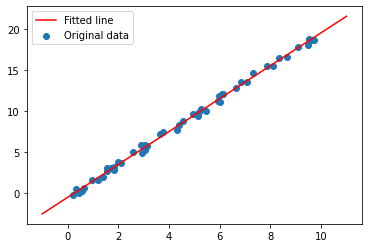

In [165]:
# Ví dụ 2:xây dựng mô hình hồi quy tuyến tính với tập dữ liệu tự tạo 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

#tao du lieu
rng = np.random.RandomState(42)
x = 10*rng.rand(50)
y = 2*x-1+rng.rand(50)

#Xay dung mo hinh
model = LinearRegression(fit_intercept = True) #
X= x[:,np.newaxis] # dựng 
model.fit(X,y)
print('Mo hinh: y=%f+%fx'%(model.intercept_,model.coef_[0]))

#ve do thi
xfit = np.linspace(-1,11)
Xfit= xfit[:, np.newaxis]
yfit = model.predict(Xfit)
_=plt.scatter(x,y, label = 'Original data')
_=plt.plot(xfit,yfit,'r',label = 'Fitted line')
_=plt.legend()
plt.show()

In [27]:
# Ví dụ 3 Giải hệ bằng phương pháp ma trận nghịch đảo
import numpy as np
A = np.array([[2,1,-1,-1], [2,5,-7,-5],[2,-1,1,3],[5,2,-4,2]])
print('detA= ',np.linalg.det(A))
print('inv(A)= ',np.linalg.inv(A))
b = np.array([1,-2,4,6])
np.linalg.solve(A,b)

detA=  4.000000000000011
inv(A)=  [[ 1.  -1.  -2.   1. ]
 [-4.   7.5 16.5 -8. ]
 [-1.5  3.5  8.  -4. ]
 [-1.5  2.   4.5 -2. ]]


array([ 1. , -1. , -0.5,  0.5])

In [128]:
###Thuật toán Khử Gauss
def gauss_jordan(A):
    m,n = A.shape
    pivots=[]   # danh sách chỉ số các hàng chứa phần tử trụ 
                # đến thời điểm hiện tại
    s=-1
    # Khử lần lượt từng cột
    for j in range(n):
        col = A[:,j].copy()
        # Chọn phần tử trụ trong cột j 
        # từ những hàng không nằm trong pivots
        for i in pivots:
            col[i] = 0
        col = np.abs(col)
        pivot_arg = np.argmax(col)
        pivot = A[pivot_arg,j]
        # Biến phần tử trụ thành 1, đổi hàng chứa trụ lên vị trí 
        # ngay dưới các hàng trong pivots, cập nhật lại pivots,
        # khử các phần tử khác trụ trên cột j thành 0
        if col[pivot_arg]!=0 and s<m-1:
            s+=1
            pivots.append(s)
            A[pivot_arg,:] = 1/pivot*A[pivot_arg,:]
            row_swap = A[s,:].copy()
            A[s,:] = A[pivot_arg,:]
            A[pivot_arg,:] = row_swap
            for i in range(m):
                if i!=s:
                    A[i,:] -= A[i,j]*A[s,:]

A = np.array([2,1,-1,-1,2,5,-7,-5,2,-1,1,3,5,2,-4,2],
             dtype=np.float).reshape(4,4)
b = np.array([1,-2,4,6],dtype=np.float).reshape(-1,1)

# Ma trận hệ số mở rộng
A_aug = np.hstack([A,b])

# Khử Gauss về dạng bậc thang
gauss_jordan(A_aug)
print(A_aug)

# Giải hệ
print("Nghiệm của hệ:",A_aug[:,-1].flatten())

[[ 1.   0.   0.   0.   1. ]
 [ 0.   1.   0.   0.  -1. ]
 [ 0.   0.   1.   0.  -0.5]
 [ 0.   0.   0.   1.   0.5]]
Nghiệm của hệ: [ 1.  -1.  -0.5  0.5]


# Bài 2: Thực hiện theo các yêu cầu như comment
####Lưu ý đọc kĩ ví dụ 2

Mo hinh: y=25792.200199+9449.962321x


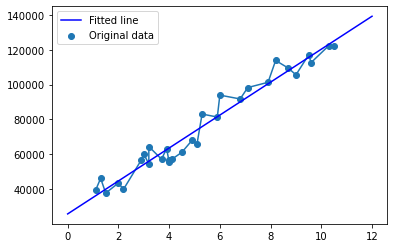

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# import mô hình Hồi quy tuyến tính từ thư viện sklearn

from sklearn.linear_model import LinearRegression

#đọc dữ liệu từ file data salary_data.csv
read = pd.read_csv('C:/Users/admin/Documents/Python Scripts/lec_4 matrix/data/salary_data.csv')
#định nghĩa biến đầu vào x
x = read['YearsExperience'].values

#định nghĩa biến đầu ra/mục tiêu y
y = read['Salary'].values

#vẽ đồ thị của biến đầu vào và đầu ra 

plt.plot(x, y)
#plt.show()

#Xay dung mo hinh sử dụng thư viện sklearn
model = LinearRegression(fit_intercept = True) 
X= x[:,np.newaxis] 
model.fit(X,y)
print('Mo hinh: y=%f+%fx'%(model.intercept_,model.coef_[0]))

#ve do thi
xfit5 = np.linspace(0,12)
Xfit5= xfit5[:, np.newaxis]
yfit5 = model.predict(Xfit5)
_=plt.scatter(x,y, label = 'Original data')
_=plt.plot(xfit5,yfit5,'b',label = 'Fitted line')
_=plt.legend()
plt.show()